##CAP 4633C - Fall 2024. Assignment 2

Group 5:

- Alberto Diaz

- Barbara Lorenzo

- Bosco Morales

- Robert Rivera

##Introduction

Answer **the three questions** in **a single Colab notebook**. Even if question 1 does not require the use of Python, include text cells in the Colab notebook and answer it there too!

##Question 1 (20 points)

Read the scientific article titled “Application of Binary Logistic Regression in Clinical Research”. Here is a link to download this article:

https://drive.google.com/file/d/1boKO1vNA8ZhdGmikbnYUoa1vvJy90x18/view?usp=sharing

Answer the following questions based on what you read in this article:


###1 a) What’s the difference between binary logistic regression and ordinal logistic regression? **Explain**


#### 1a Response

Both Linear Regression operations have continuous/categorical predictors. However, the difference centers around the results of the outcome variable. Binary logistic regression accepts a 'yes' or 'no' value for the outcome variable, whereas an ordinal regression outcome variable accepts multiple results where the order and distance between results matter (poor, fair, good,
very good, excellent).


###1 a1) Find an example online, different from the example discussed in the article, where ordinal logistic regression is applied. **Briefly discuss this example.**


#### 1 a1 Response

**Example**: "A researcher is interested in what factors influence medaling in Olympic swimming. Relevant predictors include at training hours, diet, age, and popularity of swimming in the athlete’s home country. The researcher believes that the distance between gold and silver is larger than the distance between silver and bronze."

**Citation**: UCLA: Statistical Consulting Group. “Ordinal Logistic Regression | R Data Analysis Examples.” Stats.oarc.ucla.edu, 2021, stats.oarc.ucla.edu/r/dae/ordinal-logistic-regression/.

‌
**Discussion**: This example contains multiple factors of an athelete's ability to perform with the purpose of understanding their outcome in competition. Since the level of the award matters (bronze, silver, and gold) and the distance between each level adds valuable insight to the analysis, then this clearly is an example of ordinal logistic regression



###1 b)  In equation (4) (page 10), what do you get once you plug in the values of a person’s age and smoking status?

**Note**: Your answer CANNOT be that you get the “Logit (CVD status)”. In other words, you need to explain what Logit (CVD status) means.

####1b  Response

When you plug in a person's age and smoking status into the equation, you obtain the log-odds of that person having cardiovascular disease, or in other words, the predicted probability that the person has CVD based on their age and smoking status.



###1 c)  **Explain** what the concept of odds ratio means. As you explain this concept, **illustrate it with the examples** of odd ratios discussed in the article.

####1c  Response

The odds ratio refers to

(probaility of occurring outcome Y) / (probability of not occurring outcome Y)

The odds ratio in the example provided would be the ratio of people with CVD and people without CVD. It evaluates the connection between predictors and how they effect the outcome variable. Therefore the strength of each predictor can be shown by a one unit increase of one to compare the change in the other. This is illustrated in the logit cvs equation, because the odds of both predictors - age and smoking status are evaluated in comparison to one another.








###1 d)  Read Figure 1 (page 9). In the “Model” section of Figure 1, you can read this statement:

“Predictors/ independent variables can be continuous or categorical”

Is this statement correct? If it is incorrect, **explain why**. If it is correct, **illustrate its correctness with one example we have done in class**.

####1d  Response

This statement is true. An example would be the default dataset because of the continuous variables of 'default', 'balance', and 'income', plus the categorical variable of 'student_yes'



## Environment Set-Up and Dataset Import for questions 2 and 3

For both questions, you will use the Bank Deposit data frame. The “bank_deposit.csv” file is available on Canvas.

This dataset collects multiple features of bank clients and whether each customer has subscribed for a term deposit (binary: 'yes','no').

Use the following code in a Colab notebook to create the Bank Deposit data frame:

```
bank_deposit_df= pd.read_csv(bank_dep_data_path, delimiter = ';')

bank_deposit_reduced_df= bank_deposit_df.iloc [:, [0,11,14,15,16,17,18,19,20]].copy()

bank_deposit_dummies_df= pd.get_dummies(bank_deposit_reduced_df,columns=['poutcome'], drop_first= False)

bank_deposit_dummies_df.drop(['poutcome_nonexistent'], axis= 1, inplace=True)
```

Note: Instead of  bank_dep_data_path, use the path to the csv file on your Drive.

After you have run the previous lines of code, the data frame bank_deposit_dummies_df will be ready with all the columns you need. In this data frame, there are 10 columns: nine are predictors and the outcome (which is column y (the eighth column)).

In [2]:
# Import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading the dataset

bank_deposit_df= pd.read_csv('/content/drive/MyDrive/CAP4633C Machine Learning 2/Datasets 4633/bank_deposit.csv', delimiter = ';')

bank_deposit_reduced_df= bank_deposit_df.iloc[:, [0,11,14,15,16,17,18,19,20]].copy()

bank_deposit_dummies_df= pd.get_dummies(bank_deposit_reduced_df,columns=['poutcome'], drop_first= False)

bank_deposit_dummies_df.drop(['poutcome_nonexistent'], axis= 1, inplace=True)

bank_deposit_dummies_df= pd.get_dummies(bank_deposit_reduced_df,columns=['poutcome'], drop_first= False)

bank_deposit_dummies_df.drop(['poutcome_nonexistent'], axis= 1, inplace=True)

In [6]:
bank_deposit_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               4119 non-null   int64  
 1   campaign          4119 non-null   int64  
 2   emp.var.rate      4119 non-null   float64
 3   cons.price.idx    4119 non-null   float64
 4   cons.conf.idx     4119 non-null   float64
 5   euribor3m         4119 non-null   float64
 6   nr.employed       4119 non-null   float64
 7   y                 4119 non-null   object 
 8   poutcome_failure  4119 non-null   bool   
 9   poutcome_success  4119 non-null   bool   
dtypes: bool(2), float64(5), int64(2), object(1)
memory usage: 265.6+ KB


##Question 2 (40 points)

Apply Random Forest. You **must** follow the following steps to apply this technique:

*   Split the data into 80% training and 20% testing.
*   Use the training data and cross validation via a grid search to select the best value for:
  *   The number of trees in the random forest. Try two possible values, 500 and 1000.
  *   The number of features to use when constructing each individual forest tree. Try three possible values: p/3, 6, and p.
*   Use Entropy as the criterion to grow the trees.
*   The class weighs. Try two values, None and “balanced”.
*   Use accuracy as the metric to select the best hyperparameter values.


In [7]:
x_bank= bank_deposit_dummies_df.drop ('y', axis= 1)

In [8]:
y_bank= bank_deposit_dummies_df['y']

In [9]:
x_train_bank, x_test_bank, y_train_bank, y_test_bank= train_test_split (x_bank, y_bank, test_size = 0.2, random_state = 1)

In [10]:
number_of_trees_rf = np.array ([500, 1000])

In [11]:
# We have three features in the Default dataset

number_of_features = np.array ([3,6,9])

In [12]:
hyperparam_grid_rf = {
    'criterion': ['entropy'],
    'n_estimators': number_of_trees_rf,
     'max_features': number_of_features,
    'class_weight': ['balanced', None]
}

In [13]:
# USE 3 folds , not 10 !!!!

cv_object = KFold (n_splits= 3, shuffle= True, random_state= 1)

In [14]:
grid_search_setting_rf = GridSearchCV(RandomForestClassifier(random_state=1), hyperparam_grid_rf, cv= cv_object, scoring='accuracy', n_jobs= -1)

In [15]:
grid_search_setting_rf.fit(x_train_bank, y_train_bank)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['entropy'],
                         'max_features': array([3, 6, 9]),
                         'n_estimators': array([ 500, 1000])},
             scoring='accuracy')

In [16]:
print('Parameters: ', grid_search_setting_rf.best_params_)

#suggestion: run more than once. at least twice for best min and max values

Parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_features': 3, 'n_estimators': 1000}


###2 a) (20 points) After you have selected the best hyperparameter values, use them to fit a forest to the training data. Use this forest to predict the test data and **show the classification report obtained on the test data**.

In [17]:
rf_bank= RandomForestClassifier(n_estimators = 1000, class_weight= None, criterion='entropy', max_features= 3, random_state=1)

In [18]:
rf_bank.fit (x_train_bank, y_train_bank)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=1000,
                       random_state=1)

In [19]:
y_pred_bank_rf = rf_bank.predict (x_test_bank)

#### 2a Response

The following code chunks demonstrate the predicted test data and the classification report:

In [20]:
confusion_matrix(y_test_bank, y_pred_bank_rf)

array([[714,  33],
       [ 55,  22]])

In [21]:
print (classification_report (y_test_bank, y_pred_bank_rf))

              precision    recall  f1-score   support

          no       0.93      0.96      0.94       747
         yes       0.40      0.29      0.33        77

    accuracy                           0.89       824
   macro avg       0.66      0.62      0.64       824
weighted avg       0.88      0.89      0.89       824



###2 b) (10 points) Show the calculations you need to perform to get the Recall shown in the classification report for both the ‘no’ and ‘yes’ classes. You need to show the actual numbers involved in the calculation **AND** the operation you need to perform to get both of these metrics.


#### 2b Response

In the following code chunks, we demonstrate the classification report and recall calculation for the "no" and "yes" classes:

In [22]:
TN = 714
TP = 22
FP = 33
FN = 55

In [23]:
#Formula for recall for 1 class: TP / P, P = TP + FN

recall_one = TP / (TP + FN)
print(round(recall_one, 2))

0.29


In [24]:
#Formula for recall for 0 class: TN / N, N = TN + FP

recall_zero = TN / (TN + FP)
print(round(recall_zero, 2))

0.96


###2 c) (5 points) Do you think this classifier will allow you to correctly predict whether future clients will subscribe to a term deposit with at least 90% accuracy? **Justify your answer**.

#### 2c Response

No, this classifier fails to achieve a 'Yes' recall above 50%, which is crucial for this prediction task. Although the overall accuracy is 89%, it is mainly driven by the high recall for the majority 'No' class. In contrast, the model performs poorly on the 'Yes' class, which is more valuable for predicting future clients likely to subscribe.

###2 d) (5 points) Challenge question (i.e., **you cannot ask me how to answer it**)

Among all the predictors, list the three predictors that were less likely to be part of the trees that form the forest. **Justify** why you selected these predictors.

Note: The question says “less likely” because, in principle, every predictor can be part of a forest tree (and each predictor will likely be part of at least one tree from the forest). However, we know there are predictors more likely to show up regularly in the forest trees.



In [25]:
df_feature_imp_rf = pd.Series(data= rf_bank.feature_importances_, index= x_train_bank.columns, name= "Predictor Importance in Forest")

In [26]:
df_feature_imp_rf.sort_values(ascending=False)

,Predictor Importance in Forest
age,0.348393
euribor3m,0.274164
campaign,0.121602
nr.employed,0.083263
cons.conf.idx,0.044712
poutcome_success,0.037389
cons.price.idx,0.035061
emp.var.rate,0.034116
poutcome_failure,0.021298


#### 2d Response

Each feature's importance across the trees of the forest are represented above with importance values sorted from most to least importance. According to the values, the three predictors that were less likely to be part of the trees that form the forest are:

*   cons.price.idx
*   emp.var.rate
*   poutcome_failure

##Question 3 (40 points)

Use the results of the train-test split from question 2

###3 a) (16 points) Apply Logistic Regression **without tuning any hyperparameter** and **only by setting** class_weight='balanced'.

Observe the prediction performance of the Logistic Regression model that you **obtained on the test data**. If you want to minimize the classifier's overall prediction error rate, which classifier is better, Logistic Regression or the Random Forest from question 2? **Justify your answer.**

In [27]:
quantitative_features_list = x_train_bank.columns.difference(['poutcome_failure','poutcome_success'])

In [28]:
dummy_features_list = ['poutcome_failure','poutcome_success']

In [29]:
preprocessor_bank = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features_list),
        ('cat', 'passthrough', dummy_features_list)
    ]
)

Pipeline

In [30]:
# Pipeline using base hyperparameters
pipeline_bank = Pipeline([
    ('preprocessor', preprocessor_bank),
    ('logisticregression', LogisticRegression(class_weight='balanced'))
])

Processing

In [31]:
pipeline_bank.fit(x_train_bank, y_train_bank)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  ['poutcome_failure',
                                                   'poutcome_success'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

Estimated coefficient for each predictor

In [32]:
coef_values = pipeline_bank.named_steps['logisticregression'].coef_
coef_values_abs= np.abs(coef_values[0])
column_names = x_train_bank.columns
coefficients_df = pd.DataFrame({'Features': column_names, 'Coefficients': coef_values[0], 'Abs of Coeff':coef_values_abs})
coefficients_df.sort_values(by='Abs of Coeff', ascending= True)

,Features,Coefficients,Abs of Coeff
5,euribor3m,-0.008071,0.008071
2,emp.var.rate,0.092580,0.092580
0,age,0.128938,0.128938
1,campaign,-0.187834,0.187834
6,nr.employed,-0.242303,0.242303
7,poutcome_failure,-0.279483,0.279483
3,cons.price.idx,0.372715,0.372715
4,cons.conf.idx,-0.745824,0.745824
8,poutcome_success,1.662904,1.662904


Testing and Evaluation

In [33]:
y_predicted_bank = pipeline_bank.predict(x_test_bank)

In [34]:
confusion_matrix(y_test_bank, y_predicted_bank)

array([[565, 182],
       [ 18,  59]])

In [35]:
print (classification_report (y_test_bank, y_predicted_bank))

              precision    recall  f1-score   support

          no       0.97      0.76      0.85       747
         yes       0.24      0.77      0.37        77

    accuracy                           0.76       824
   macro avg       0.61      0.76      0.61       824
weighted avg       0.90      0.76      0.80       824



#### 3a Response

Although both the 'no' predictor and the accuracy goes down for the random forest model, it is justified by the increase in the 'yes' predictor drastically increasing. Since the 'yes' predictor exceeds 50% in the logistic regression, this model becomes a more rounded and reliable model for predicting the likelihood of future clients subscribing.


###3 b) (16 points) Apply Logistic Regression following these steps:

Apply GridSearchCV() EXACTLY AS WE DID IN CLASS (otherwise, you will receive 0 points for this part).
Use accuracy as the metric to select the best hyperparameter values.

Use the value of the test f1-score for the positive class to decide which logistic regression model is better. The one from part a or the one from part b? **Justify**.

Cross-Validation

In [36]:
# pipe to apply the grid search cross validation
pipeline_gridsearch_lr = Pipeline( [ ('preprocessor', preprocessor_bank), ('logisticregression', LogisticRegression())])

In [37]:
C_hyper= np.array ([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10.0, 50.0, 100.0, 1000.0])

In [38]:
weights = [None, 'balanced']

In [39]:
hyperparam_grid_bank = {
    'logisticregression__C': C_hyper,
    'logisticregression__class_weight': weights
    ,'logisticregression__max_iter':[100]
}

In [40]:
cv_object = KFold (n_splits= 10, shuffle= True, random_state= 1)

In [41]:
grid_search_lr_bank = GridSearchCV(estimator= pipeline_gridsearch_lr, param_grid = hyperparam_grid_bank, cv = cv_object, scoring = 'accuracy', n_jobs = -1)

In [42]:
grid_search_lr_bank.fit(x_train_bank, y_train_bank)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         ['poutcome_failure',
                                                                          'poutcome_success'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-03, 5.e-03, 1.e-02, 5.e-02, 1.e-01, 5.e-01, 1.e+00, 1.e+01,
       5.e+01, 1.e+02, 1.e+03]),
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__max_iter': [100]},
             scoring='accuracy')

In [43]:
print("Best hyperparameters found: ", grid_search_lr_bank.best_params_)

Best hyperparameters found:  {'logisticregression__C': 0.05, 'logisticregression__class_weight': None, 'logisticregression__max_iter': 100}


Hyper-parameter Tuning

In [44]:
pipeline_bank_tuned = Pipeline ([
    ('preprocessor', preprocessor_bank),
    ('logisticregression', LogisticRegression(class_weight=grid_search_lr_bank.best_params_['logisticregression__class_weight'],
                                              C = grid_search_lr_bank.best_params_['logisticregression__C']))])

In [45]:
pipeline_bank_tuned.fit(x_train_bank, y_train_bank)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  ['poutcome_failure',
                                                   'poutcome_success'])])),
                ('logisticregression', LogisticRegression(C=0.05))])

Testing and Evaluation

In [47]:
y_predicted_bank_tuned = pipeline_bank_tuned.predict(x_test_bank)

In [48]:
confusion_matrix(y_test_bank, y_predicted_bank_tuned)

array([[737,  10],
       [ 63,  14]])

In [49]:
print (classification_report (y_test_bank, y_predicted_bank_tuned))

              precision    recall  f1-score   support

          no       0.92      0.99      0.95       747
         yes       0.58      0.18      0.28        77

    accuracy                           0.91       824
   macro avg       0.75      0.58      0.62       824
weighted avg       0.89      0.91      0.89       824



#### 3b Response

Based on the f1-score for the 'yes' class, the model from Q3.A is the better option because it has a value of 0.37 wheras the value for Q3.B is 0.28.


###3 c) (8 points) Challenge question (i.e., **you cannot ask me how to answer it**)

Write the Logistic Regression model (i.e., equation) you obtained in part b.

In [51]:
coef_values = pipeline_bank_tuned.named_steps['logisticregression'].coef_
coef_values_abs= np.abs(coef_values[0])
column_names = x_train_bank.columns
coefficients_df = pd.DataFrame({'Features': column_names, 'Coefficients': coef_values[0], 'Abs of Coeff':coef_values_abs})
coefficients_df

,Features,Coefficients,Abs of Coeff
0,age,0.104012,0.104012
1,campaign,-0.156437,0.156437
2,emp.var.rate,0.161242,0.161242
3,cons.price.idx,0.279406,0.279406
4,cons.conf.idx,-0.364845,0.364845
5,euribor3m,-0.268810,0.268810
6,nr.employed,-0.384537,0.384537
7,poutcome_failure,-0.289942,0.289942
8,poutcome_success,0.829442,0.829442


In [52]:
intercept = pipeline_bank_tuned.named_steps['logisticregression'].intercept_[0]
intercept

-2.3884516548877732

#### 3c Response

Linear Regression model formula substituted with the given coefficient values:

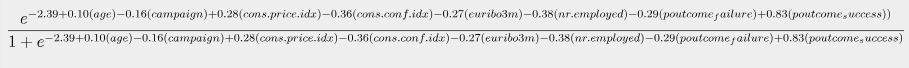


